## <font color=Yellow size=20>Manjeel Chalise
KCE080BCT015
</script>

# Wine Quality Prediction 

##  Objective: Predict the quality of wine on a scale (e.g., 0 to 10) based on physicochemical properties such as acidity, pH, alcohol content, and sugar levels.

## Source:https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from scipy.stats import zscore
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df=pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [56]:
df.columns



Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Id'],
      dtype='object')

In [57]:
df.shape

(1143, 13)

In [58]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [59]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


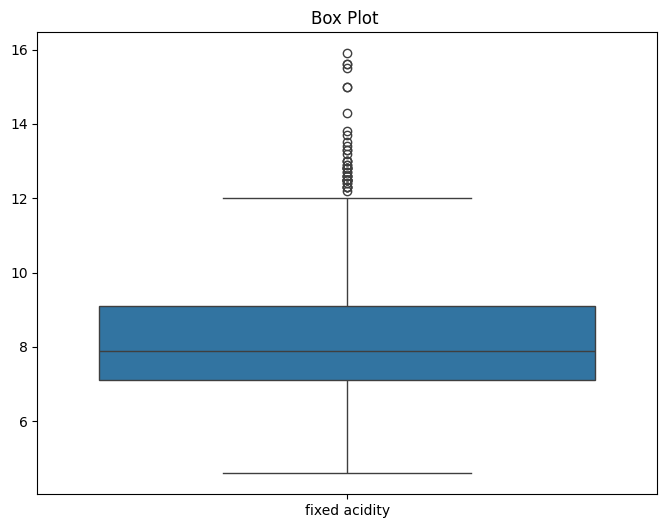

In [18]:
first_f = ['fixed acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[first_f])
plt.title("Box Plot ")
plt.show()

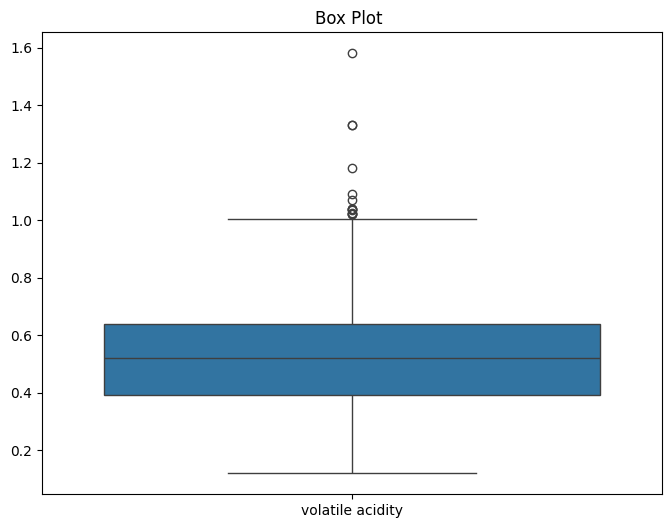

In [19]:
second_four = ['volatile acidity']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four])
plt.title("Box Plot ")
plt.show()

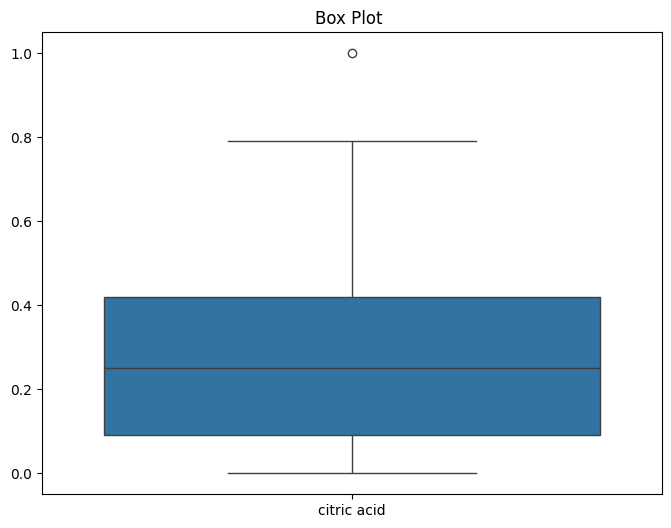

In [13]:
second_four1 = ['citric acid']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

### As there is only one outlier in citric acid we can remove it easily

In [15]:
Q1 = df['citric acid'].quantile(0.25)
Q3 = df['citric acid'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the index of the first outlier in citric acid
outlier_index = df[(df['citric acid'] < lower_bound) | (df['citric acid'] > upper_bound)].index

if len(outlier_index) > 0:
    # Remove only the first outlier
    df = df.drop(outlier_index[0])
    print(f"Removed one outlier at index {outlier_index[0]}")
else:
    print("No outliers found in citric acid.")

No outliers found in citric acid.


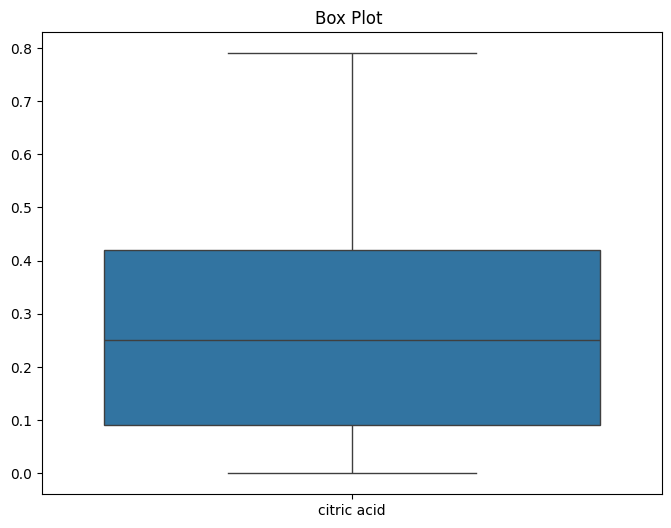

In [16]:
second_four1 = ['citric acid']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

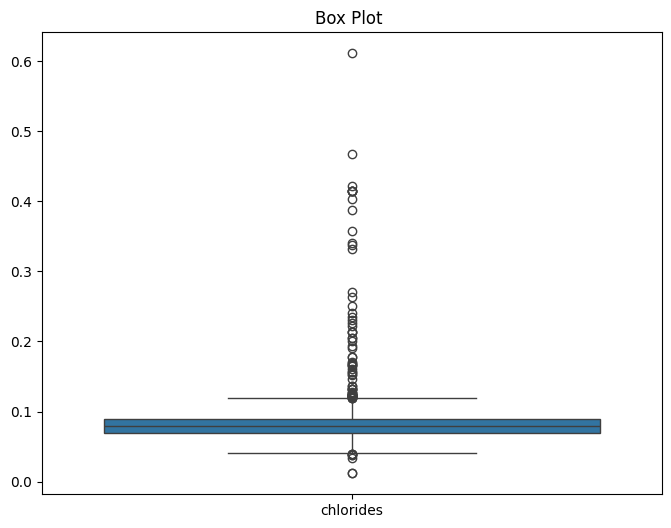

In [17]:
second_four1 = ['chlorides']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

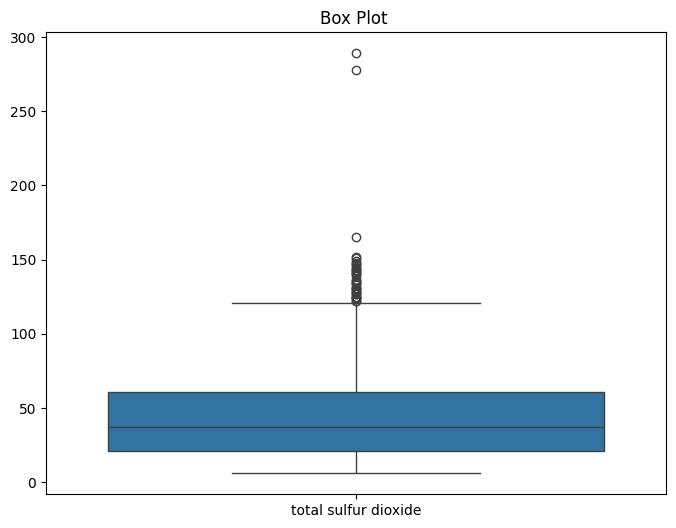

In [20]:
second_four1 = ['total sulfur dioxide']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

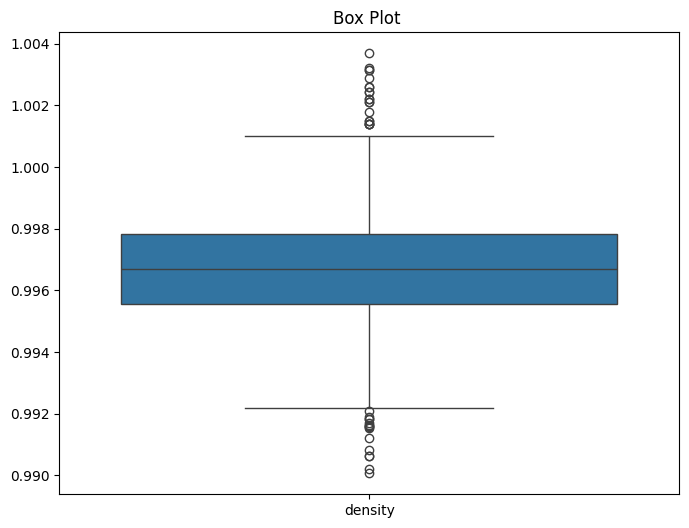

In [21]:
second_four1 = ['density']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

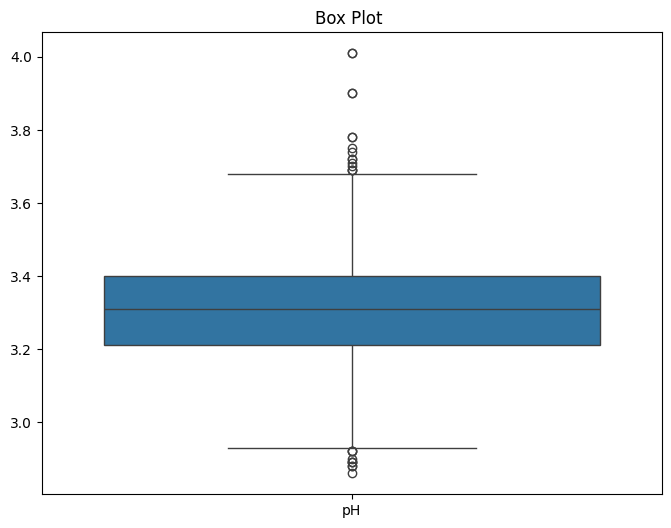

In [22]:
second_four1 = ['pH']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

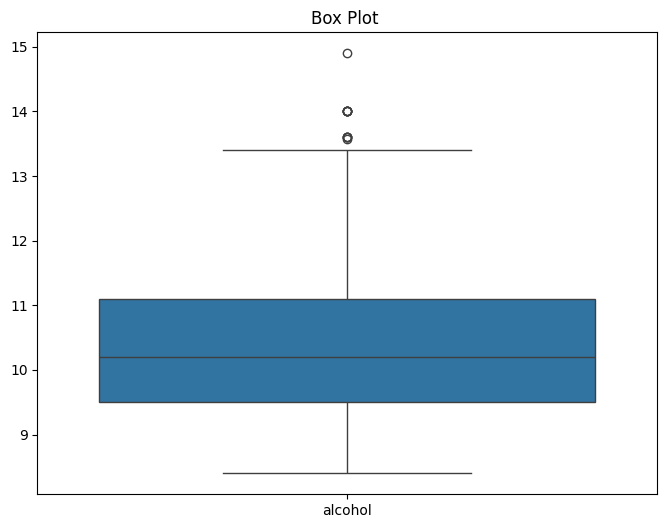

In [23]:
second_four1 = ['alcohol']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

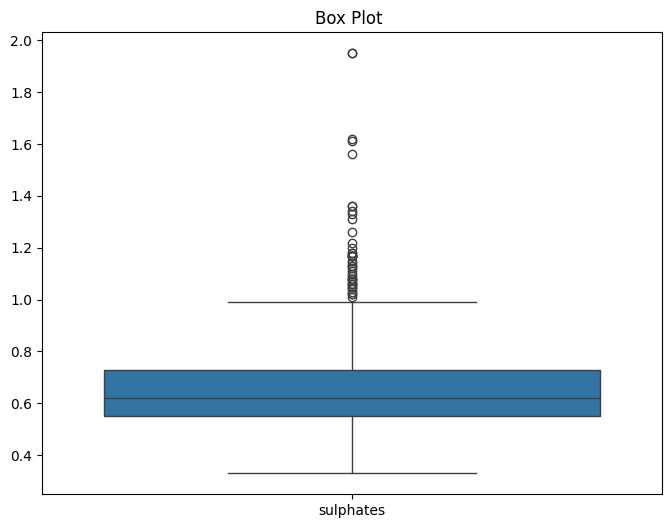

In [24]:
second_four1 = ['sulphates']

plt.figure(figsize=(8, 6))
sns.boxplot(data=df[second_four1])
plt.title("Box Plot ")
plt.show()

In [25]:

z_scores = df.apply(zscore)
outliers = (abs(z_scores) > 3).sum()

print("Number of outliers in each column:\n", outliers)

Number of outliers in each column:
 fixed acidity            9
volatile acidity         5
citric acid              0
residual sugar          23
chlorides               22
free sulfur dioxide     13
total sulfur dioxide    10
density                 12
pH                       6
sulphates               20
alcohol                  7
quality                  6
Id                       0
dtype: int64


## Visualization of the quality of wine on a scale

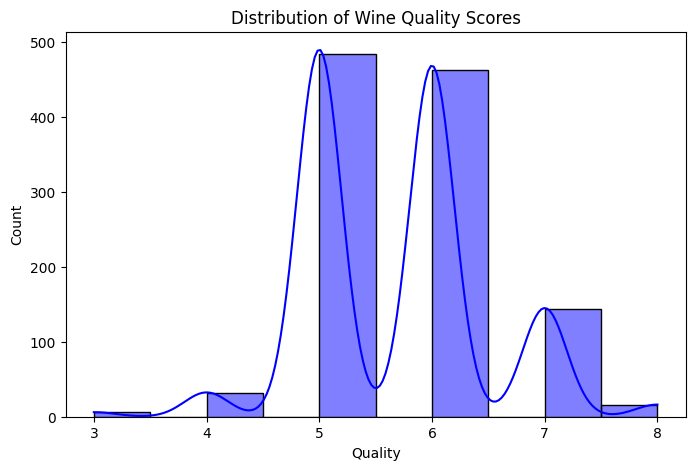

In [26]:
plt.figure(figsize=(8, 5))
sns.histplot(df['quality'], bins=10, kde=True, color='blue')
plt.title("Distribution of Wine Quality Scores")
plt.xlabel("Quality")
plt.ylabel("Count")
plt.show()

## Conversion of the numerical quality scores into three categories: Bad, Average and Excellent


In [27]:
def categorize_quality(q):
    if q <= 4:
        return "Bad"
    elif 5 <= q <= 6:
        return "Average"
    else:
        return "Excellent"
df['quality_category'] = df['quality'].apply(categorize_quality)
print(df['quality_category'])


0       Average
1       Average
2       Average
3       Average
4       Average
         ...   
1138    Average
1139    Average
1140    Average
1141    Average
1142    Average
Name: quality_category, Length: 1142, dtype: object


In [28]:

category_counts = df['quality_category'].value_counts()
print(category_counts)


quality_category
Average      945
Excellent    159
Bad           38
Name: count, dtype: int64


## Analyzing how the different features affect the quality scores

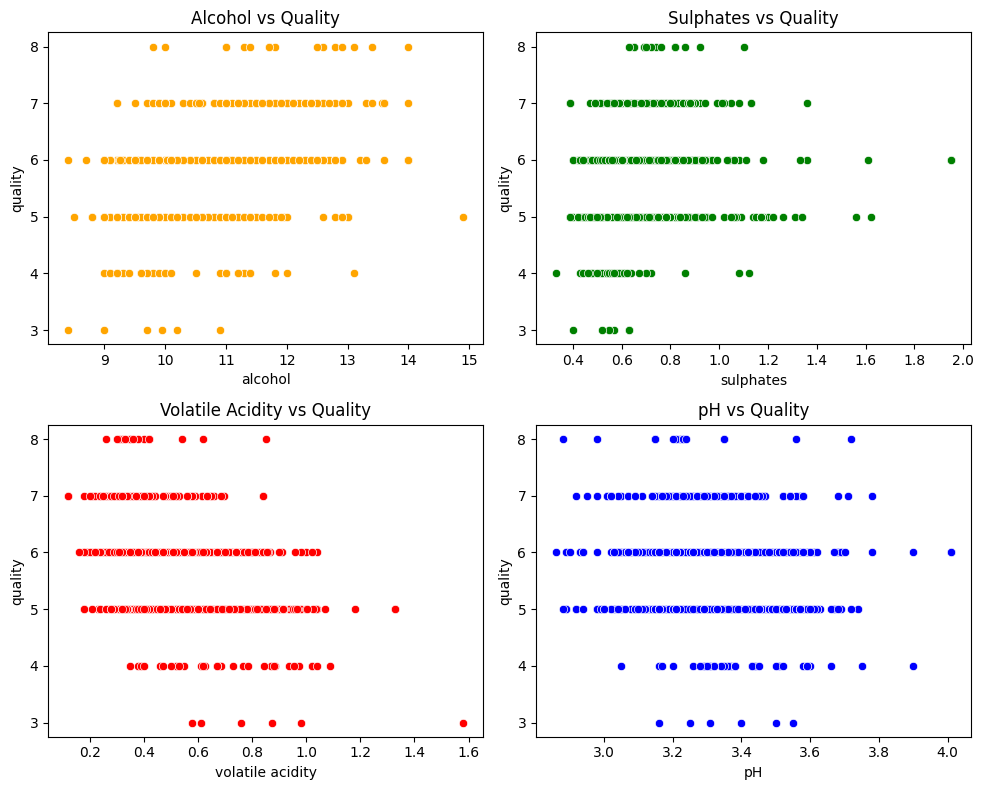

In [29]:
# Plot key features vs. quality
plt.figure(figsize=(10, 8))

# Alcohol vs Quality
plt.subplot(2, 2, 1)
sns.scatterplot(x='alcohol', y='quality', data=df, color='orange')
plt.title('Alcohol vs Quality')

# Sulphates vs Quality
plt.subplot(2, 2, 2)
sns.scatterplot(x='sulphates', y='quality', data=df, color='green')
plt.title('Sulphates vs Quality')

# Volatile Acidity vs Quality
plt.subplot(2, 2, 3)
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='red')
plt.title('Volatile Acidity vs Quality')

# pH vs Quality
plt.subplot(2, 2, 4)
sns.scatterplot(x='pH', y='quality', data=df, color='blue')
plt.title('pH vs Quality')

plt.tight_layout()
plt.show()

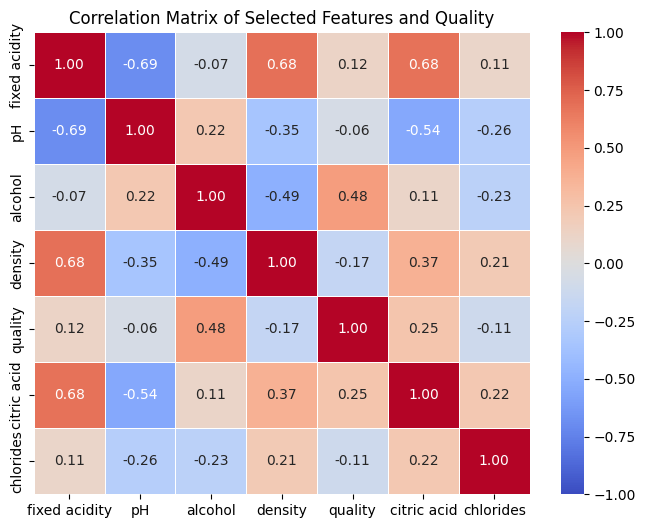

In [30]:

relevant_columns = ['fixed acidity', 'pH', 'alcohol', 'density', 'quality','citric acid','chlorides']



relevant_data = df[relevant_columns].copy()

corr_matrix = relevant_data.corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Selected Features and Quality')
plt.show()


## Visualization of pairwise relationship between the different features:fixed acidity,ph,alcohol,density

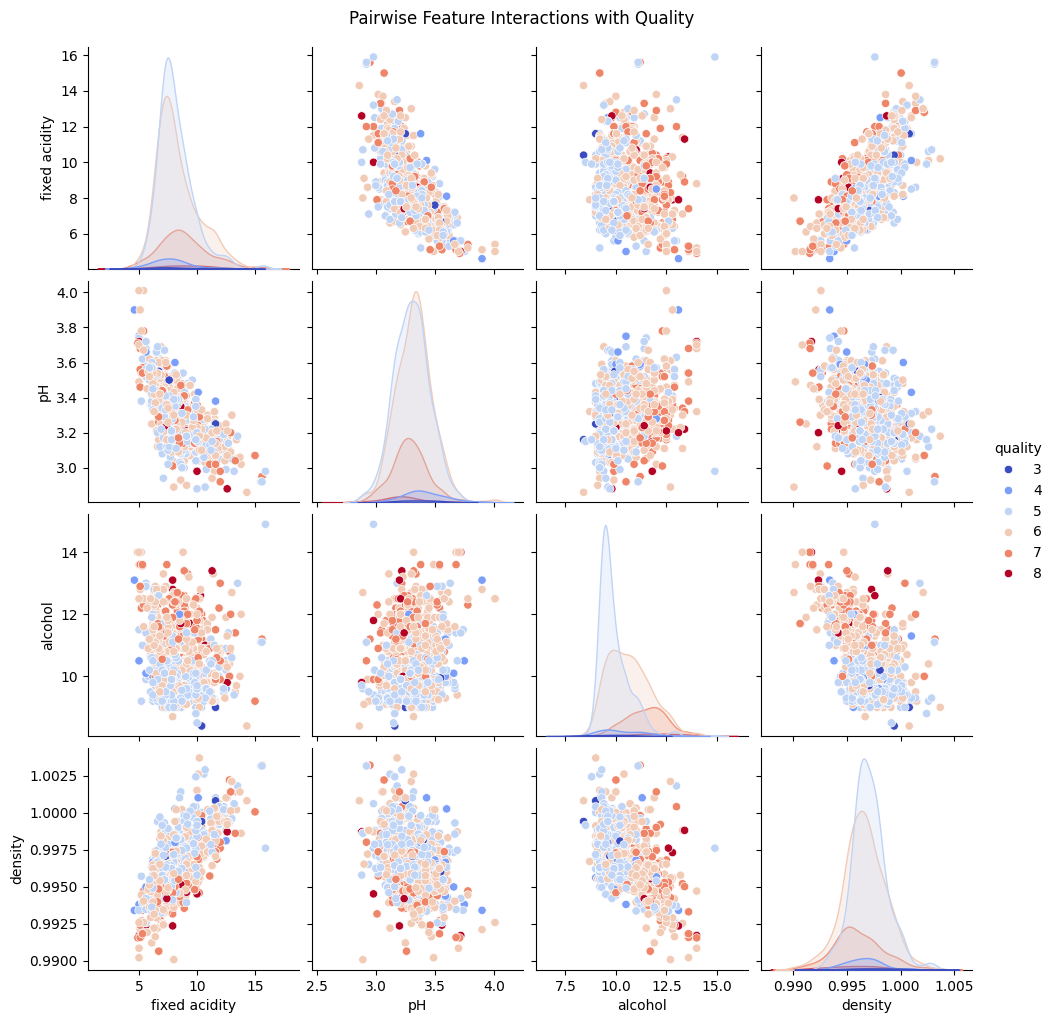

In [31]:

sns.pairplot(df[['fixed acidity', 'pH', 'alcohol', 'density', 'quality']], hue='quality', palette='coolwarm')
plt.suptitle('Pairwise Feature Interactions with Quality', y=1.02)
plt.show()


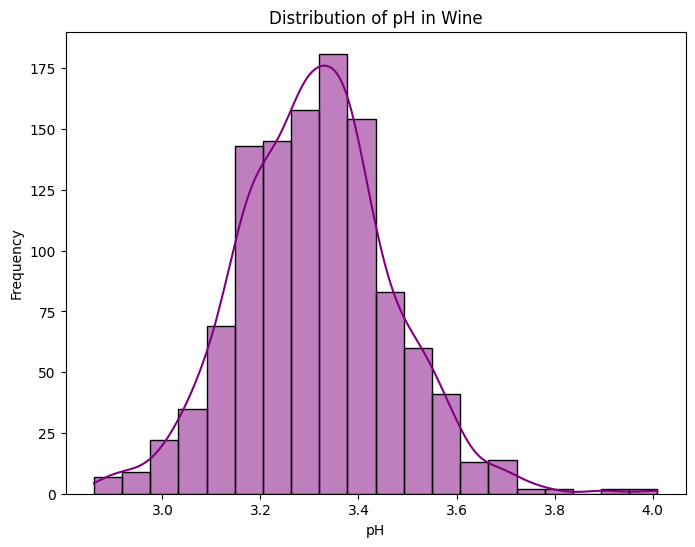

In [32]:
# Histogram to visualize pH distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['pH'], kde=True, color='purple', bins=20)
plt.title('Distribution of pH in Wine')
plt.xlabel('pH')
plt.ylabel('Frequency')
plt.show()


### This shows that most wines have ph in the range of 3.0-4.0

## Acidity composition in the wine(Visualization)

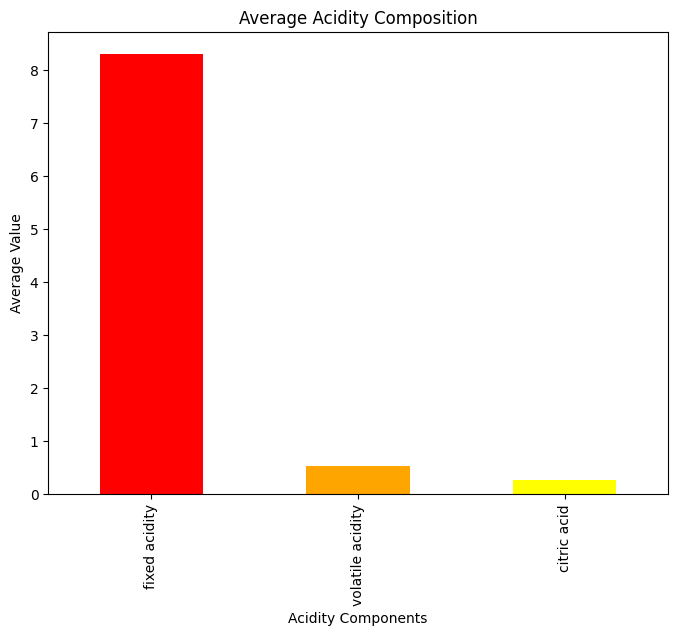

In [33]:
# Bar plot for acidity components
df[['fixed acidity', 'volatile acidity', 'citric acid']].mean().plot(kind='bar', color=['red', 'orange', 'yellow'], figsize=(8, 6))
plt.title('Average Acidity Composition')
plt.xlabel('Acidity Components')
plt.ylabel('Average Value')
plt.show()


## Free sulphur vs total sulfur comparison

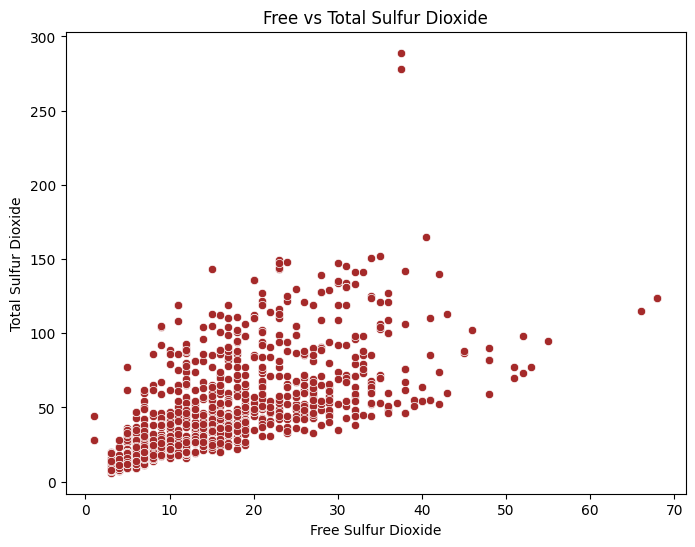

In [34]:
# Scatter plot of free vs total sulfur dioxide
plt.figure(figsize=(8, 6))
sns.scatterplot(x='free sulfur dioxide', y='total sulfur dioxide', data=df, color='brown')
plt.title('Free vs Total Sulfur Dioxide')
plt.xlabel('Free Sulfur Dioxide')
plt.ylabel('Total Sulfur Dioxide')
plt.show()


## Density vs Sugar analysis

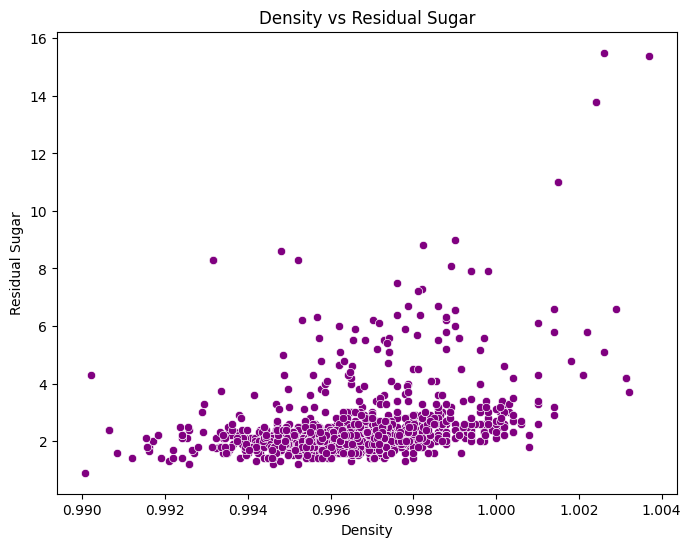

In [35]:
# Scatter plot of density vs residual sugar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='residual sugar', data=df, color='purple')
plt.title('Density vs Residual Sugar')
plt.xlabel('Density')
plt.ylabel('Residual Sugar')
plt.show()


## Alcohol vs Density visualization

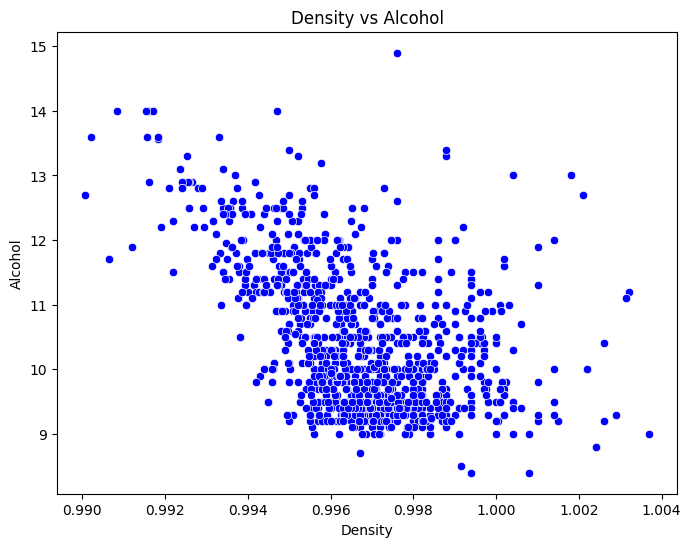

In [36]:
# Scatter plot of density vs alcohol
plt.figure(figsize=(8, 6))
sns.scatterplot(x='density', y='alcohol', data=df, color='blue')
plt.title('Density vs Alcohol')
plt.xlabel('Density')
plt.ylabel('Alcohol')
plt.show()


### The above graph shows that the higher the alcohol level, the lower is the density level

## Feature Engineering

### Introduction of new features like Acidity Ratio, Sulphur Balance and Sugar-Alcohol Ratio.

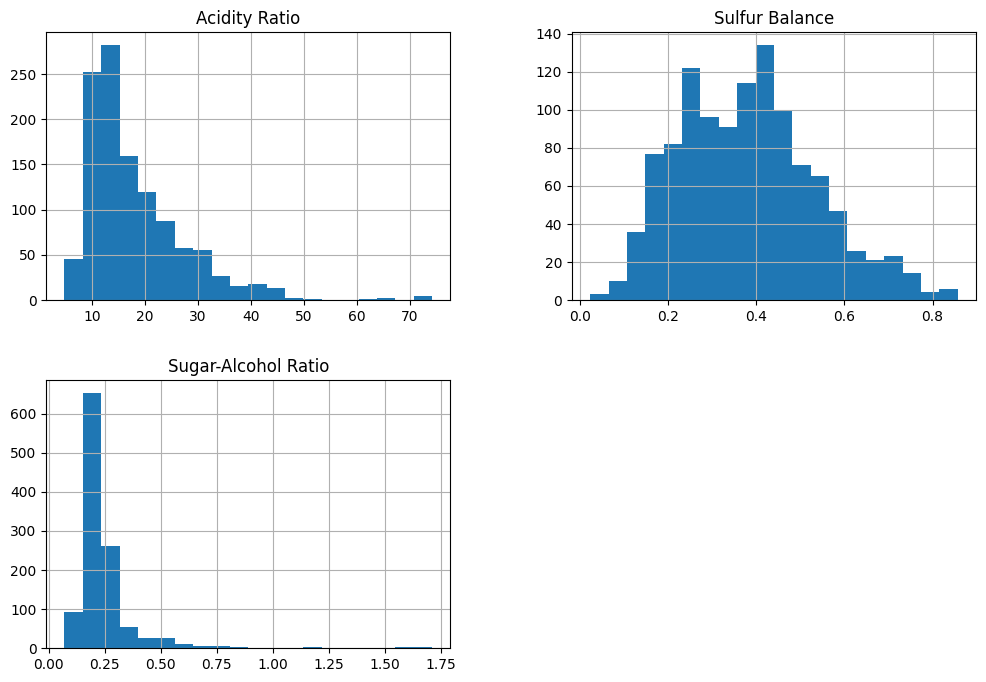

In [37]:
# Feature Engineering
df['Acidity Ratio'] = df['fixed acidity'] / df['volatile acidity']
df['Sulfur Balance'] = df['free sulfur dioxide'] / df['total sulfur dioxide']
df['Sugar-Alcohol Ratio'] = df['residual sugar'] / df['alcohol']

# Plot the new features
df[['Acidity Ratio', 'Sulfur Balance', 'Sugar-Alcohol Ratio']].hist(figsize=(12, 8), bins=20)
plt.show()


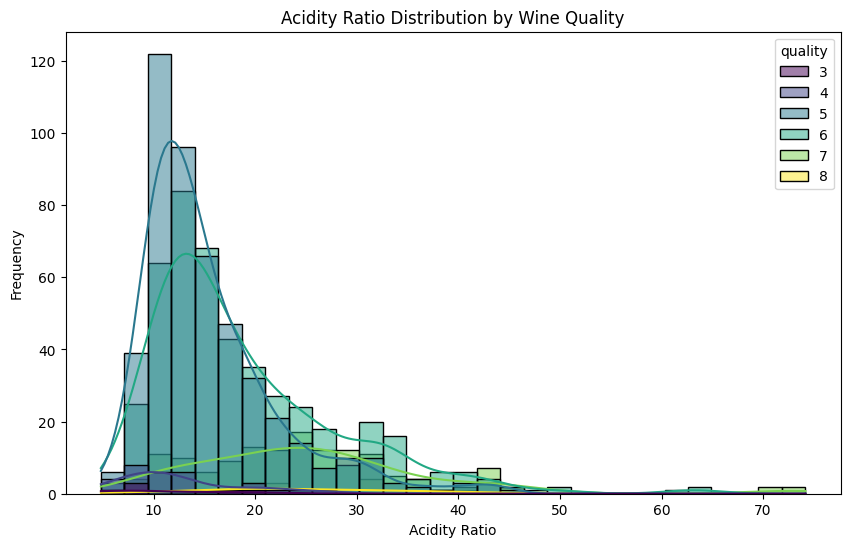

In [38]:
# Plotting the distribution of Acidity Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Acidity Ratio', hue='quality', kde=True, bins=30, palette='viridis')
plt.title('Acidity Ratio Distribution by Wine Quality')
plt.xlabel('Acidity Ratio')
plt.ylabel('Frequency')
plt.show()


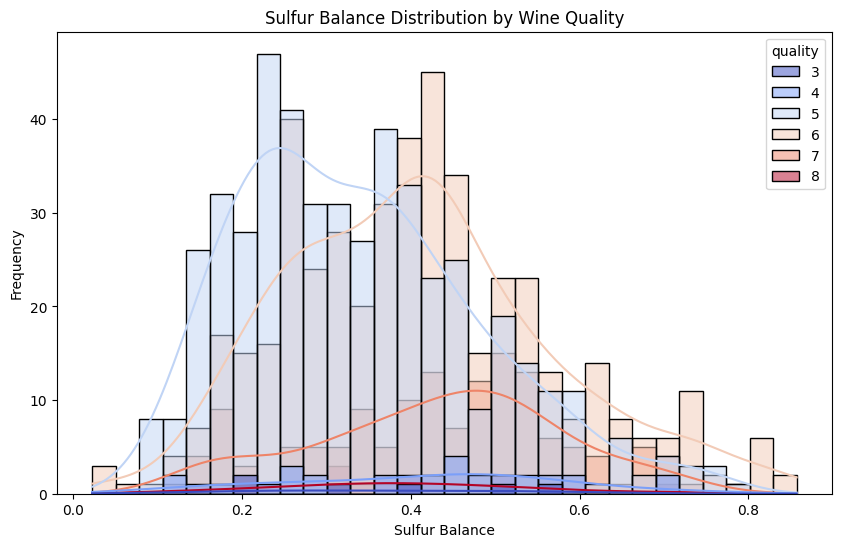

In [39]:
# Plotting the distribution of Sulfur Balance based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sulfur Balance', hue='quality', kde=True, bins=30, palette='coolwarm')
plt.title('Sulfur Balance Distribution by Wine Quality')
plt.xlabel('Sulfur Balance')
plt.ylabel('Frequency')
plt.show()


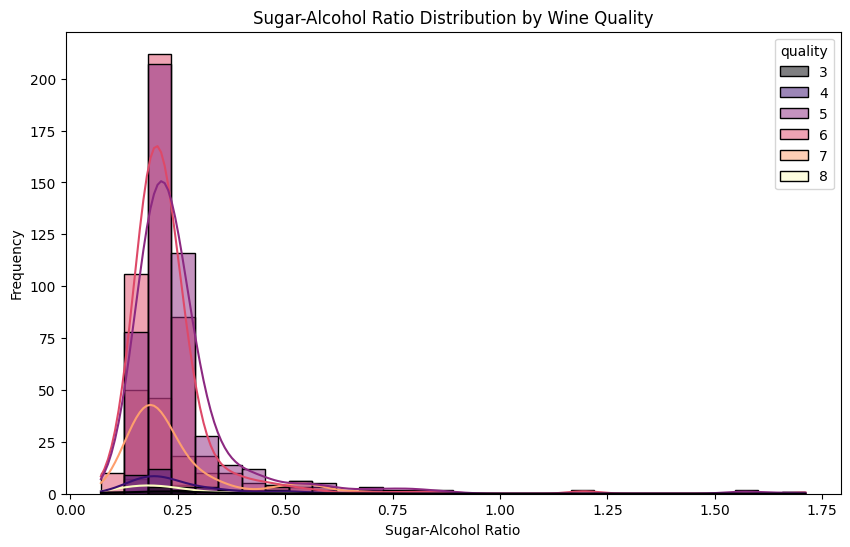

In [40]:
# Plotting the distribution of Sugar-Alcohol Ratio based on Quality
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sugar-Alcohol Ratio', hue='quality', kde=True, bins=30, palette='magma')
plt.title('Sugar-Alcohol Ratio Distribution by Wine Quality')
plt.xlabel('Sugar-Alcohol Ratio')
plt.ylabel('Frequency')
plt.show()


## Separation of columns to train the model

In [42]:
X = df[[ 'fixed acidity', 
    'volatile acidity', 
    'citric acid',
    'chlorides',  
    'total sulfur dioxide', 
    'density',  
    'pH', 
    'sulphates',
    'alcohol', 
    'Acidity Ratio',  
     ]]
y = df['quality_category'] 

## Dividing the dataset into two for testing and training the model 

In [43]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)


### Here 20 % of the data is set to test data whereas the rest is to train the model

In [44]:
model = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')

### Training the model

In [45]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [46]:
y_pred = model.predict(X_test)
print(y_pred)

['Average' 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Excellent'
 'Average' 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Average'
 'Excellent' 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Excellent' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Excellent' 'Excellent'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Excellent' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Average' 'Average'
 'Average' 'Average' 'Average' 'Average' 'Average' 'Ave

### Prediction of the wine quality for the 20% test data is given above.

In [47]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 88.65%


In [48]:
# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[188   0   9]
 [  6   0   0]
 [ 11   0  15]]


In [49]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Average       0.92      0.95      0.94       197
         Bad       0.00      0.00      0.00         6
   Excellent       0.62      0.58      0.60        26

    accuracy                           0.89       229
   macro avg       0.51      0.51      0.51       229
weighted avg       0.86      0.89      0.87       229



c:\Users\ACER\Documents\projects\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\Documents\projects\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ACER\Documents\projects\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result)

In [50]:
# Format: [fixed acidity, volatile acidity, citric acid, chlorides, total sulfur dioxide, density, pH, sulphates, alcohol, Acidity Ratio]
new_wine_data = np.array([7.4, 0.7, 0.0, 0.076, 34.0, 0.9978, 3.51, 0.56, 9.4, 7.4/0.7]).reshape(1, -1)
predicted_class = model.predict(new_wine_data)
#Actual class=Average
print(predicted_class)


['Average']


c:\Users\ACER\Documents\projects\myenv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
